# Classification Project 
## - Shelter Animal Outcomes - Help improve outcomes for shelter animals

-------------------------------

#### 팀이름 : 다롱이초롱이

-------------------------------------

##  [ 목차 ]
   ### 1. 분석의 개요 및 목적
   ### 2. 데이터 set 분석
   ### 3. EDA
   ### 4. 데이터 전처리 및 모델링
   ### 5. 최종 모델

-------------------------------------

### 1. 분석의 개요 및 목적 : 

- 미국에서 매년 7.6 million의 애완동물이 동물 보호소에 맡겨지고 있음, 이 중 2.7 million의 애완동물이 안락사됨
- 보호소에 맡겨진 동물 중 Adoption될 동물을 예측하는데 focus를 맞추고자함


### 2. 데이터 셋 분석

- Texas의 대형 동물 보호소인 Austin Animal Center에서 제공한 data set
- 2013년 10월 1일부터 2016년 3월까지의 data

### 1. Train set : 26729 rows

(1) Train set x value
1. AnimalID : sequence id
2. Name : pet's name
3. DateTime : outcome이 발생한 시간,  YYYY-MM-DD HH:MM:SS
4. AnimalType : dog or cat 카테고리 2개
5. SexuponOutcome : 카테고리 5개
 - Intact Female - 암컷
 - Intact Male - 수컷
 - Neutered Male - 중성화된 수컷
 - Spayed Femail - 중성화된 암컷
 - Unknown - 성별 알수 없음
6. AgeuponOutcome : 1day ~ 20 year (day, week, month, year) 카테고리 44개
7. Breed : 카테고리 1380개
8. Color : 카테고리 366개
9. OutcomeSubtype : OutcomeType에 대한 부가설명

(2) Train set y value (5개 클래스)
1. OutcomeType : Adoption(입양),Died(죽음), Euthanasia(안락사) ,Return_to_owner(집주인에게 돌아감),Transfer(다른 센터로 이송)

### 2. Test  data set : 11456 rows

(1) Test set x value
1. ID : sequence id
2. Name : pet's name
3. DateTime : outcome이 발생한 시간,  YYYY-MM-DD HH:MM:SS
4. AnimalTyp : dog or cat 카테고리 2개
5. SexuponOutcome : 1day ~ 21 year (day, week, month, year), 카테고리 5개
 - Intact Female - 수컷
 - Intact Male - 암컷
 - Neutered Male - 중성화된 수컷
 - Spayed Femail - 중성화된 암컷
 - Unknown - 성별 알수 없음
6. AgeuponOutcome : 카테고리 45개
7. Breed : 카테고리 913개
8. Color : 카테고리 277개

(2) Train set y value (5개 클래스)
1. OutcomeType : Adoption(입양),Died(죽음), Euthanasia(안락사) ,Return_to_owner(집주인에게 돌아감),Transfer(다른 센터로 이송)

In [3]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import numpy as np
import pandas as pd
import xgboost

from matplotlib              import style
from patsy                   import dmatrix
from sklearn.linear_model    import LinearRegression
from sklearn.datasets        import make_regression
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing   import LabelEncoder
from sklearn.svm             import SVC
from sklearn.metrics         import log_loss,accuracy_score
from sklearn.metrics         import roc_curve, auc
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import *
from sklearn.ensemble        import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

C:\Users\itfev\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\itfev\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


* Data Load from csv

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test  = pd.read_csv('data/test.csv')

df_train.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


* 결측치 확인

#### train set
* name : 비어있는 값 있음(7691)
* OutcomeSubtype : 비어있는 값 있음 (13612)
* SexuponOutcome : 비어있는 값 있음 (1)
* AgeuponOutcome : 18 row null

In [5]:
df_train.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

#### test set
* Name           : 비어있는 값 있음 (3225)
* AgeuponOutcome : 비어있는 값 있음 (6)

In [6]:
df_test.isnull().sum()

ID                   0
Name              3225
DateTime             0
AnimalType           0
SexuponOutcome       0
AgeuponOutcome       6
Breed                0
Color                0
dtype: int64

#### 변수 제외:
* AnimalID - 식별id로 제외
* DateTime - Outcome이 발생한 시간을 기록하여 제외
* OutcomeSubtype - test set에 없는 칼럼이라 제외

### 3. EDA 분석

#### (1) OutcomeType

OutcomeType
Adoption           10769
Died                 197
Euthanasia          1555
Return_to_owner     4786
Transfer            9422
Name: AnimalID, dtype: int64


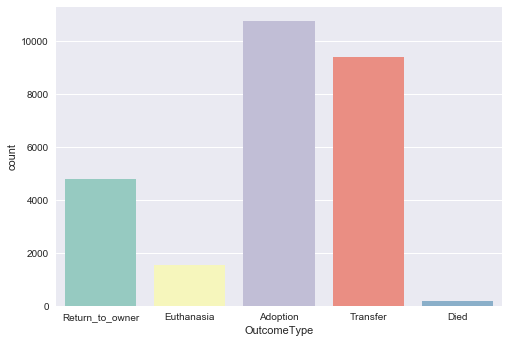

In [127]:
print(df_train.groupby("OutcomeType").count()['AnimalID'])
sns.countplot(df_train.OutcomeType, palette='Set3')
plt.show()

OutcomeType      AnimalType
Adoption         Cat           4272
                 Dog           6497
Died             Cat            147
                 Dog             50
Euthanasia       Cat            710
                 Dog            845
Return_to_owner  Cat            500
                 Dog           4286
Transfer         Cat           5505
                 Dog           3917
dtype: int64


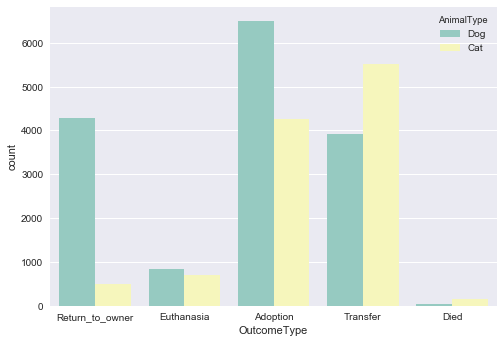

In [128]:
# Dog의 경우  Return to Owner, Adoption이 많으나 고양이의 경우 Trasfer가 많음 
print(df_train.groupby(['OutcomeType','AnimalType']).size())
sns.countplot(data=df_train, x ='OutcomeType',hue='AnimalType',palette='Set3')
plt.show()

#### (2) AnimalType

AnimalType
Cat    11134
Dog    15595
dtype: int64


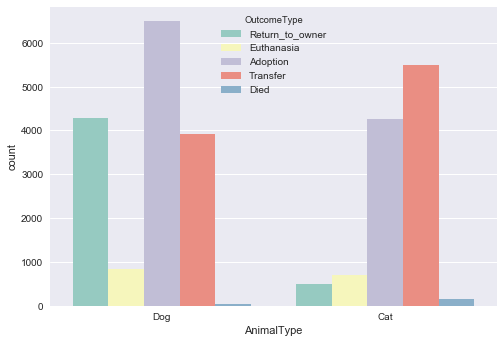

In [129]:
print(df_train.groupby('AnimalType').size())
sns.countplot(df_train.AnimalType, palette='Set3', hue = df_train['OutcomeType'])
plt.show()

#### (3) SexuponOutcome

SexuponOutcome
Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
dtype: int64


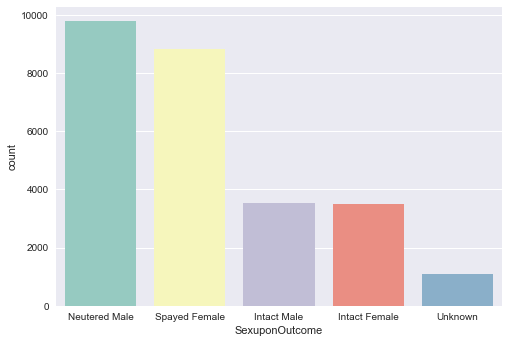

In [116]:
## Unknown : 1093건 
print(df_train.groupby('SexuponOutcome').size().sort_values(ascending = False))
sns.countplot(df_train.SexuponOutcome, palette='Set3')
plt.show()

SexuponOutcome
Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
dtype: int64


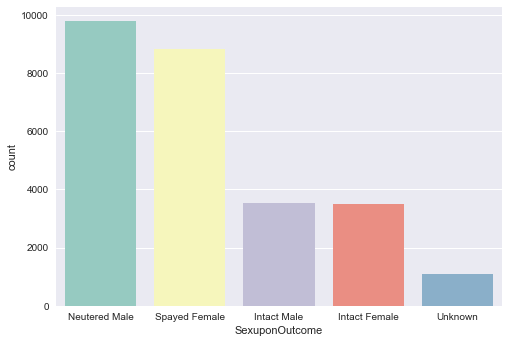

In [131]:
print(df_train.groupby('SexuponOutcome').size().sort_values(ascending = False))
sns.countplot(df_train.SexuponOutcome, palette='Set3')
plt.show()

SexuponOutcome  OutcomeType    
Intact Female   Adoption            203
                Died                 56
                Euthanasia          401
                Return_to_owner     301
                Transfer           2550
Intact Male     Adoption            158
                Died                 79
                Euthanasia          477
                Return_to_owner     477
                Transfer           2334
Neutered Male   Adoption           5222
                Died                 19
                Euthanasia          344
                Return_to_owner    2247
                Transfer           1947
Spayed Female   Adoption           5186
                Died                 18
                Euthanasia          232
                Return_to_owner    1748
                Transfer           1636
Unknown         Died                 25
                Euthanasia          101
                Return_to_owner      12
                Transfer            955
dtype: i

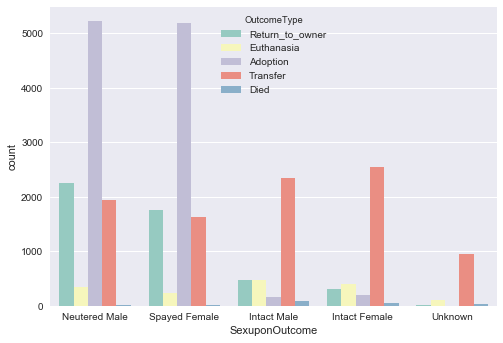

In [55]:
## 중성화 되었을경우 Return to Owner, Adoption case가 많음 
## 중성화가 안된경우 transfer 높음, 안락사도 1.5배 이상
## Unknown 의 경우 transfer의 경우가 제일 높음 
print(df_train.groupby(['SexuponOutcome','OutcomeType']).size())
sns.countplot(x=df_train.SexuponOutcome,hue=df_train.OutcomeType, palette='Set3')
plt.show()

#### (4) AgeuponOutcome

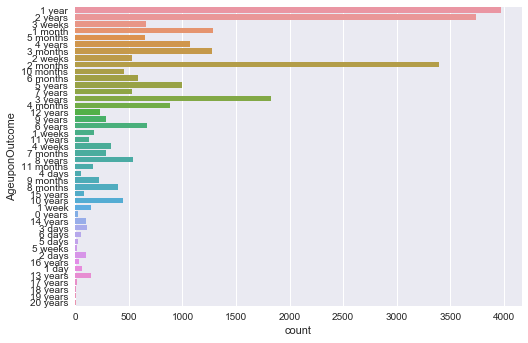

In [96]:
## Nan값:18 건, Unknown: 0건 , 0 years: 22 건 
sns.countplot(y = df_train.AgeuponOutcome) ## Original Data
plt.show()

#### (5) Name

In [132]:
df_name = df_train['Name'].copy()
df_name = df_name.replace(np.nan, 'Unknown')

def Name(x):
    if x.find('Unknown') == 0: return "Without Name"
    return "With Name"

df_name = df_name.apply(Name)

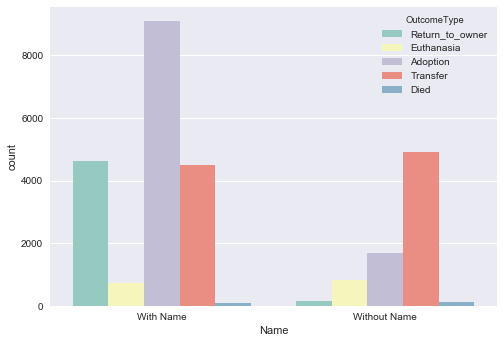

In [133]:
sns.countplot(df_name, palette='Set3',hue = df_train['OutcomeType'] )
plt.show()

### 4. 데이터 전처리 및 모델링

#### * 모델 평가 지표 : log_loss

$$
\begin{eqnarray}
\text{logloss} 
&=& -\dfrac{1}{N} \sum_{i=1}^N \sum_{j=1}^M y_{ij} \log(p_{ij})\\
\end{eqnarray}
$$

#### (1) 첫번째 모델

![model1](./image/1.jpg)

In [7]:
class preprocessing1():
    
    def __init__(self,df_data):
        self.df_data = df_data

    # execution
    def execution_pr(self):
        #Name
        self.df_data['Name']= self.df_data['Name'].fillna(0)
        self.df_data['Name'] = self.df_data['Name'].apply(lambda x : 0 if x ==0 else 1)
        
        #AnimalType
        self.df_data['AnimalType']= self.df_data['AnimalType'].apply(lambda x : 1 if x == 'Cat' else 0)
        
        
        # AgeuponOutcome
        self.df_data['AgeuponOutcome'].fillna(value = 'Unknown', inplace=True)
        class_le = LabelEncoder()
        self.df_data['AgeuponOutcome'] = class_le.fit_transform(self.df_data['AgeuponOutcome'].values)

        # SexuponOutcome
        self.df_data['SexuponOutcome'].fillna(value = 'Unknown', inplace=True)
        class_le = LabelEncoder()
        self.df_data['SexuponOutcome'] = class_le.fit_transform(self.df_data['SexuponOutcome'].values)
        
        #Breed
        class_le = LabelEncoder()
        self.df_data['Breed'] = class_le.fit_transform(self.df_data['Breed'].values)
        
        #Color
        class_le = LabelEncoder()
        self.df_data['Color'] = class_le.fit_transform(self.df_data['Color'].values)
        
        
        return self.df_data

In [18]:
class modeling():
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def randomForest(self):
        r_forest = RandomForestClassifier(n_estimators = 5, random_state = 0, n_jobs= -1)
        r_forest.fit(self.x,self.y)
        y_pred = r_forest.predict_proba(self.x)
        #scores = log_loss(y, y_pred)
        
        rdfscore = cross_val_score(r_forest, self.x, self.y, scoring="neg_log_loss", cv=KFold(20, shuffle=True)).mean()*-1
        rdfstd   = cross_val_score(r_forest, self.x, self.y, scoring="neg_log_loss"    , cv=KFold(20, shuffle=True)).std()
        rdfaccur = cross_val_score(r_forest, self.x, self.y, scoring="accuracy"    , cv=KFold(20, shuffle=True)).mean()
        
        
        return rdfscore, rdfstd, rdfaccur

    def xgboost(self):
        cv = KFold(5, shuffle = True)
        xgb = xgboost.XGBClassifier(n_estimators=130, max_depth=5)
        xgscore = cross_val_score(xgb, self.x, self.y, scoring="neg_log_loss", cv=cv)*-1
        xgscore_mean = xgscore.mean()
        xgscore_std  = xgscore.std()
        xgaccur = cross_val_score(xgb, self.x, self.y, scoring="accuracy", cv=cv).mean()
        
        return xgscore_mean,xgscore_std,xgaccur
    
    def gridSearch(self):
        cv = KFold(5, shuffle = True)
        est_range = [100, 110, 120, 130]
        depth_range = [1,3,5,7,9]
        param_grid = [{'n_estimators': est_range, 'max_depth': depth_range}]
        gs = GridSearchCV(estimator=xgboost.XGBClassifier(objective="multi:softprob"), param_grid=param_grid, scoring='neg_log_loss', cv=cv, n_jobs=-1)
        gs = gs.fit(self.x, self.y)
        gs_score = gs.best_score_ * -1
        gs_parm  = gs.best_params_
        return gs_score, gs_parm

In [8]:
# Preprocessing
df_train1 = df_train.copy()
df_test1 = df_test.copy()

pr_train1 = preprocessing1(df_train1)
df_train1 = pr_train1.execution_pr()
pr_test1 = preprocessing1(df_test1)
df_test1 = pr_test1.execution_pr()

In [9]:
# Feature selection
col = ['AnimalType','Name','AgeuponOutcome','SexuponOutcome','Breed','Color']

x = df_train1[col]
y = df_train1['OutcomeType']

In [17]:
# modeling
model1 = modeling(x,y)
rdf_score, rdf_std, rdf_accur  = model1.randomForest()
xg_score, xg_std, xg_accur = model1.xgboost()
grd_score, grd_param = model1.gridSearch()

print('[ RandomForest score ]')
print('Cross val score    : ', rdf_score)
print('Cross val std      : ', rdf_std)
print('Cross val accuracy : ', rdf_accur,'\n')

print('[ Xgboost score ]')
print('Cross val score    : ', xg_score)
print('Cross val std      : ', xg_std)
print('Cross val accuracy : ', xg_accur,'\n')   

print('[ GridSearch score ]')
print('Best params        : ', grd_param)
print('Cross val score    : ', grd_score)

{'max_depth': 5, 'n_estimators': 130}
[ RandomForest score ]
Cross val score    :  5.58348559697
Cross val std      :  0.236627382147
Cross val accuracy :  0.578247254556 

[ Xgboost score ]
Cross val score    :  0.854921761118
Cross val std      :  0.0062274144383
Cross val accuracy :  0.645067072345 

[ GridSearch score ]
Cross val score    :  0.853666812281


#### (2) 두 번째 모델

![model2](./image/2.jpg)

In [24]:
## Dog's type 총 10 category

## 목양견, 양치기견
Herding = ['Bearded Collie', 'Beauceron', 'Belgian Malinois','Malinois','Anatol','Anatol Shepherd',
       'Belgian Sheepdog', 'Belgian Tervuren', 'Bergamasco','Kelpie/Pit','Kelpie/Finnish',
       'Berger Picard', 'Shetland Sheepdog', 'Border Collie','Border Collie/Greyhound', 'Briard',
       'Pyrenean Shepherd', 'Puli', 'Polish Lowland Sheepdog','Border','Collie/Rottweiler',
       'Cardigan Welsh Corgi','Cardigan', 'Pembroke Welsh Corgi','Welsh','Corgi/Brittany','Border Collie/Rottweiler',
       'Old English Sheepdog', 'Collie', 'Norwegian Buhund','Pointer/Collie Smooth','Pointer/Collie',
       'Miniature American Shepherd', 'Entlebucher Mountain Dog','Belgian Malinois','Dutch','Dutch Shepherd'
       'Finnish Lapphund', 'Gefrman Shepherd', 'Icelandic Sheepdog','Catahoula/Pit',
       'Spanish Water Dog', 'Australian Shepherd Mix', 'Australian Shepherd','Bouvier des Flandres',
       'Queensland Heeler','Heeler', 'Swedish Vallhund','Swedish Vallhund Mix','Vallhund', 'Australian Cattle Dog',
        'Black Mouth Cur','Mouth','Catahoula', 'Anatolian Shepherd Dog',
        'Collie','Sheepdog','Corgi','Mountain','Cattle','Water Dog']
Australian_Shepherd = ['Australian Shepherd Mix','Australian Shepherd','Australian Shepherd/Anatol Shepherd']

## 사냥견
Hound = ['Greyhound','Basset', 'Hound','Saluki','Rhodesian Ridgeback','Redbone Coonhound','Treeing','Treeing Walker Coonhound',
         'Treeing Walker Coonhound Mix','Beagle/Pointer','Beagle/Staffordshire','Portuguese Podengo Pequeno','Podengo Pequeno Mix',
         'Podengo','Plott','Norwegian Elkhound','Pharaoh Hound','Petit Basset Griffon Vend_en','Pug/Beagle','Beagle/Pug',
         'Afghan Hound','Otterhound','Whippet','Borzoi','English Foxhound','Irish Wolfhound','Wolfhound','Basenji','Basset Hound',
         'Boxer/Beagle','Beagle','Beagle/Treeing','Harrier','Harrier/Catahoula','Sloughi','Ibizan Hound','American Foxhound','Foxhound',
         'Rhod Ridgeback','Rhod ','Ridgeback','Rhod/Ridgeback','Black and Tan Coonhound','Beagle/Chihuahua','Pbgv','Boxer/Harrier',
         'American English Coonhound','Coonhound','Bloodhound','Bluetick Coonhound','Scottish Deerhound','Plott Hound',
         "Cirneco dell'Etna",'Pit Bull/Dogue De Bordeaux','Carolina','De','Bordeaux','Basenji/Chihuahua']

## 실내견,가정견,애완견 Companian dogs
Non_Sporting = ['Finnish','French Bulldog','Keeshond','Dalmatian','Dalmatian/Boxer','Sharpei','Chinese Sharpei','Chinese Sharpei Mix','Coton de Tulear',
 'Lhasa Apso','Lhasa', 'Apso','Norwegian Lundehund','L_wchen','Xoloitzcuintli','Schipperke','Schipperke/Chihuahua','American Bulldog','Bulldog/Pointer',
 'English Bulldog','Bichon Fris','Bichon Frise Mix','Bichon','Bulldog','Standard Poodle','Eskimo','Tibetan Spaniel','Bulldog/Chihuahua',
 'Chinese Shar Pei','Miniature Poodle','Shiba Inu','Mexican Hairless Mix','Crested']
## 스포츠견, 활동적, 야외활동
Sporting = ['Greyhound/Dalmatian','Irish Red and White Setter','Irish Setter','Setter/Pit','Sussex Spaniel','Nova Scotia Duck Tolling Retriever','Irish Water Spaniel',
 'Labrador Retriever','Retriever/Whippet','Labrador','Lagotto Romagnolo','Vizsla','Vizsla Mix','Vizsla/Boxer','Vizsla/Staffordshire',
 'Vizsla/Rhod Ridgeback', 'Vizsla/Catahoula','Weimaraner','Pointer','Pointer/Catahoula','Catahoula/Pointer','Dachshund/Harrier','Canario',
 'Welsh Springer Spaniel','Springer', 'Spaniel','WireDachshund/Chihuahuahaired Pointing Griffon','Dachshund/Catahoula','Dachshund/German','Landseer','Jindo',
 'Wirehaired Vizsla','Spinone Italiano','Spinone','Spinone Italiano Mix','Gordon Setter','Brittany','Golden','Golden Retriever','Boykin','Boykin Span Mix','Boykin Spaniel','American Water Spaniel','American Eskimo Dog',
 'English Cocker Spaniel','English Setter','English Setter Mix','Curly-Coated Retriever','Cocker Spaniel','Cocker','English Springer Spaniel','Field Spaniel','Shiba','Inu/Dachshund',
 'Clumber Spaniel','Flat Coat','Flat','Flat Coated Retriever','Retriever','Chesapeake Bay Retriever','Chesa','Chow Chow','Chow','Bay','German Shorthaired Pointer',
 'German Wirehaired Pointer','Cocker Spaniel/Dachshund','Spaniel/Dachshund','Dachshund','Dachshund/Pit','Dachshund/Beagle',
 'Beagle/Dachshund','Dachshund/Chihuahua','Dachshund/Catahoula','Dachshund/Whippet','Wirehaired']
## 테리어견종 - 사냥견중 작은 품종( 주로 오소리, 새등을 잡는 품종으로 개량됨)
Terrier = ['Skye Terrier','Cesky Terrier','Norfolk Terrier','Dandie Dinmont Terrier','Border Terrier','Scottish Terrier','Terrier/Dachshund',
 'Norwich Terrier','Parson Russell Terrier','Miniature Schnauzer','Rat Terrier','Sealyham Terrier','Russell Terrier','Terrier/Boxer','Tibetan Terrier',
 'Bedlington Terrier','Smooth Fox Terrier','Bull Terrier (Miniature)','Staffordshire','Staffordshire/Labrador Retriever',
 'Staffordshire/French Bulldog','Staffordshire/English Bulldog','Staffordshire/Boxer','Staffordshire/Beagle','Glen of Imaal Terrier','Imaal','Wire Fox Terrier','Boston Terrier',
 'Bull Terrier','Highland','West Highland White Terrier','Irish Terrier','Welsh Terrier','Airedale Terrier','Staffordshire Bull Terrier',
 'Kerry Blue Terrier','Cairn Terrier','American Hairless Terrier','Lakeland Terrier','American Staffordshire Terrier','Australian Terrier',
 'Manchester Terrier','Soft-Coated Wheaten Terrier','Miniature Bull Terrier', 'Cairn Terrier/Chihuahua Shorthair','Terrier/Chihuahua','Cairn Terrier',
 'Jack Russell Terrier Mix','Rat Terrier','Cairn','Russell','Rat','Terrier/Border','Norwich Terrier/Pug','Terrier/Pug','Terr','Feist']
## 토이견 
Toy = ['Toy','Poodle/Maltese','Toy Poodle/Maltese','Brussels Griffon','Pomeranian','Silky Terrier','American Eskimo Dog (Toy)',
       'Toy Fox Terrier','Affenpinscher','Shih Tzu','Shih', 'Tzu','Whippet/Chihuahua Shorthair','Whippet/Chihuahua','Bruss Griffon Mix','Bruss',
        'Pug','Pug/Chihuahua','Yorkshire Terrier','Toy Poodle','Miniature Pinscher','Japanese Chin','Chinese Crested Dog','Maltese','Pekingese',
         'Italian Greyhound','English Toy Spaniel','Papillon','Chihuahua','Havanese','Cavalier King Charles Spaniel','Cavalier','Bull/Chihuahua',
         'Miniature','Poodle','Yorkshire', 'Terrier','Norfolk','West Highland/Chihuahua Shorthair','Highland/Chihuahua',
       'Papillon/Chihuahua Shorthair','Papillon/Chihuahua','Maltese/Yorkshire']
## 비지니스 활동견
Working = ['Giant Schnauzer','Australian Kelpie','Kelpie','Alaskan Malamute','Alaskan', 'Malamute',
       'Greater Swiss Mountain Dog', 'Komondor', 'Kuvasz','Blue Lacy/Beagle','Lacy/Beagle',
           'Blue Lacy','Lacy','Blue Lacy/Pit Bull','Lacy/Pit','Lacy/Collie','Boxer/Staffordshire',
       'Tibetan Mastiff', 'Great Pyrenees','Great Pyrenees Mix','Pyrenees', 'Leonberger',
       'Pinscher', 'Standard Schnauzer','Great Pyrenees/Anatol Shepherd','Pyrenees/Anatol',
       'Mastiff', 'Bullmastiff', 'Canaan','Schnauzer','Cane Corso','Corso',
        'St.','St. Bernard','St. Bernard Rough Coat Mix', 'Boxer', 'Samoyed',
       'Doberman Pinscher', 'Boerboel', 'Bernese Mountain Dog', 'Chinook','Akita Mix','Akita',
       'Siberian Husky','Husky','Siberian Husky/German Shepherd','Siberian','Husky/German', 'Newfoundland', 'Neapolitan Mastiff',
       'Doberman Pinsch','Doberman', 'Pinsch', 'Portuguese Water Dog', 'Black Russian Terrier',
       'Great Dane','Great','Dane','Dane/Staffordshire','Great Dane/Staffordshire']
Unknown = ['Unknown','Unknown Mix','Nan','nan']
## 맹견, 투사견 또는 fierce
Fierce = ['Pit','Pit Bull','Pit Bull Mix','American Pit Bull Terrier Mix','American Pit Bull Terrier','Dogo Argentino','Pit Bull/Pit Bull',
            'Pit Bull Terrier','Labrador Retriever/Pit Bull','Pit Bull/Rottweiler','Pit Bull/Chinese Sharpei','Bull/Chinese',
            'Bull/Rottweiler','Rottweiler Mix','Rottweiler','Boxer/Pit Bull','Pit Bull/Boxer','Pit Bull/St. Bernard Smooth Coat',
            'Dogo','Argentino','Dogo Argentino Mix','Dogo Argentino/Chinese Sharpei','kita/Pit Bull','Akita/Pit','Pit Bull/Weimaraner',
            'American Pit Bull Terrier/Chinese Sharpei','Pit Bull/Mastiff','Mastiff/Pit Bull','Pit Bull/Catahoula','Canaan Dog/Pit Bull',
         'American Pit Bull Terrier/Catahoula']
## Guard 견 
German_Shepherd = ['German Shepherd Mix','German Shepherd','German Shepherd/Akita','Shepherd/Australian',
                   'German Shepherd/Rottweiler','German Shepherd/Pit Bull','German Shepherd/Catahoula','Rottweiler/German Shepherd',
                   'German','Shepherd/Rottweiler','German Shepherd/Collie Rough','Beagle/German','German Shepherd/Boxer',
                   'Beagle/German Shepherd','Boxer/German Shepherd','German Shepherd/Mastiff','German Shepherd/Collie Smooth']

In [104]:
## Cat's Type 9종류 분류 ( 위키피디아 기준)

## 미국토종 고양이 (미국인들 선호, 대부분의 고양이가 여기에 포함), 쥐잡이용 고양이, 활동성 큼, 건강함 , 애교많음 , 질투많음
## Domestic _short 의 경우 압도적으로 개체수가 많음 (9천건 이상), Mediumhair, Longhair는 각각 천마리 미만
Domestic_Short= ['American Shorthair Mix','Domestic Shorthair Mix',
            'Domestic Shorthair','Domestic Shorthair/Domestic Medium Hair']
Domestic_Medium = ['Domestic Medium Hair Mix','Domestic Medium Hair' ]
Domestic_Long = [ 'Domestic Longhair Mix','Domestic Longhair','Domestic Longhair/Rex']

## 브리티쉬 고양이 ( 미국 토종고양이의 조상)
British = ['British Shorthair Mix','Domestic Shorthair/British Shorthair','British Shorthair']
## 시암고양이, 우아함, 특이한 색, 흰색& 회백색 얼굴 , 질투많음, 관심 보살핌 필요
Siamese = ['Siamese Mix','Siamese','Siamese/Domestic Shorthair','Domestic Medium Hair/Siamese',
           'Domestic Shorthair/Siamese' ,'Siamese/Japanese Bobtail']
#스노우 슈: 여왕의 고양이, 온순하고 영리. 혼자 방치되는 것을 싫어함
Snowshoe =['Snowshoe','Snowshoe Mix','Snowshoe/Ragdoll']
##특이품종이지만 개채수 20마리 이상
Russian_Blue = ['Russian Blue Mix','Russian Blue','Domestic Longhair/Russian Blue']
Persian = ['Persian Mix','Persian','Domestic Longhair/Persian']
Manx = ['Manx Mix','Manx','Manx/Domestic Longhair','Manx/Domestic Shorthair','Domestic Shorthair/Manx']
Maine_Coon = ['Maine Coon Mix','Maine Coon']
## 특이 품종 20 마리 미만
Exotic = ['Abyssinian Mix','Himalayan Mix','Himalayan','Bengal Mix','Bengal','Ragdoll Mix','Angora Mix','Japanese Bobtail Mix',
          'Bombay Mix','Balinese Mix','Tonkinese Mix','Pixiebob Shorthair Mix','Cymric Mix','Turkish Van Mix',
          'Sphynx','Exotic Shorthair Mix','Javanese Mix','Cornish Rex Mix','Ragdoll','Burmese','Devon Rex Mix',
          'Ocicat Mix','Devon Rex','Norwegian Forest Cat Mix','Munchkin Longhair Mix','Havana Brown Mix']

In [105]:
def BreedGroups(x):
      
    x =str(x)
    if x: ## 개 3그룹으로 선분류 
        if x in Unknown:
            return 'Companion'  ##array([ 4967, 23667]) - Dogs, return to owner & Names exsist
        elif x in Fierce:
            return 'Fierce'
        elif x in German_Shepherd:
            return 'Working'
        elif x in Australian_Shepherd:
            return 'Herding'
        
        ## 고양이 그룹 분류: 9 종류 
        elif x in Domestic_Short: ## Domestic Shorthair 의 개체수가 압도적으로 많음 9천건 이상
            return 'Domestic'
        elif x in Domestic_Medium:
            return 'Domestic'
        elif x in Domestic_Long:
            return 'Domestic'
            
        elif x in British:
            return 'Exotic'
        elif x in Siamese:
            return 'Exotic'
        elif x in Snowshoe:
            return 'Exotic'
        elif x in Russian_Blue:
            return 'Exotic'
        elif x in Persian:
            return 'Exotic'
        elif x in Manx:
            return 'Exotic'
        elif x in Maine_Coon:
            return 'Exotic'
        elif x in Exotic:
            return 'Exotic'
        
## 선분류 그룹에 속하지 않는 그룹: 개 7 종류 (목적 분류 세분화 )       
        else: 
            x = x.split()
            for i in x: 
                if i in Herding:
                    return 'Herding'
                elif i in Hound:
                    return 'Hunting'
                elif i in Non_Sporting:
                    return 'Companion'
                elif i in Sporting:
                    return 'Sporting'
                elif i in Terrier:
                    return 'Hunting'
                elif i in Toy:
                    return 'Toy'
                elif i in Working:
                    return 'Working'
                
        return 'Sporting'

In [111]:
class preprocessing2():
    
    def __init__(self,df_data):
        self.df_data = df_data

    # execution
    def execution_pr(self):
        #Name
        self.df_data['Name']= self.df_data['Name'].fillna(0)
        self.df_data['Name'] = self.df_data['Name'].apply(lambda x : 0 if x ==0 else 1)
        
        #AnimalType
        self.df_data['AnimalType']= self.df_data['AnimalType'].apply(lambda x : 1 if x == 'Cat' else 0)
        
        # AgeuponOutcome
        self.df_data['AgeuponOutcome'].fillna(value = 'Unknown', inplace=True)
        class_le = LabelEncoder()
        self.df_data['AgeuponOutcome'] = class_le.fit_transform(self.df_data['AgeuponOutcome'].values)

        # SexuponOutcome
        self.df_data['SexuponOutcome'].fillna(value = 'Unknown', inplace=True)
        class_le = LabelEncoder()
        self.df_data['SexuponOutcome'] = class_le.fit_transform(self.df_data['SexuponOutcome'].values)

        # Breed
        self.df_data['Breed'] = self.df_data['Breed'].apply(BreedGroups)
        self.df_data['BreedGroup'] = self.df_data['Breed']
        
        class_le = LabelEncoder()
        self.df_data['Breed'] = class_le.fit_transform(self.df_data['Breed'].values)
        
        #Color
        init_color1 = self.df_data['Color'].copy()
        
        def color(x):
            if x.find("/") >= 1 : return x.split("/")[0]
            if x.find(" ") >= 1: return x.split(" ")[0]
            else: return x

        def color1(x):
            if x.find(" ") >= 1: return x.split(" ")[0]
            else: return x

        init_color1 = init_color1.apply(color)
        init_color1 = init_color1.apply(color1)

        def color_maj(x):
            brown_color = ["Brown", "Apricot", "Buff", "Chocolate", "Red", "Orange", "Ruddy", "Liver" ]
            lig_brown_color = ["Fawn", "Gold",  "Tan", "Yellow"]
            rare_color = ["Blue", "Tricolor", "Calico", "Sable", "Pink", "Torbie", "Tortie", "Agouti"]
            black_color = ["Black", "Flame", "Seal"]
            white_color = ["White", "Cream", "Lynx"]
            lig_black_color = ["Gray", "Lilac", "Silver"]

            if x in brown_color: return "Brown"
            if x in lig_brown_color: return "Light Brown"
            if x in black_color: return "Black"
            if x in lig_black_color: return "Light Black"
            if x in white_color: return "White"
            if x in rare_color: return "Rare Color"

        init_color1 = init_color1.apply(color_maj)
        y_color = init_color1
        class_le = LabelEncoder()
        init_color1= class_le.fit_transform(init_color1)
        self.df_data['Color'] = init_color1
        
        return self.df_data, y_color

In [112]:
# Preprocessing
df_train2 = df_train.copy()
df_test2 = df_test.copy()

pr_train2 = preprocessing2(df_train2)
df_train2, y_color = pr_train2.execution_pr()
pr_test2 = preprocessing2(df_test2)
df_test2 = pr_test2.execution_pr()

BreedGroup
Companion      401
Domestic     10388
Exotic         746
Fierce        2367
Herding       1904
Hunting       1576
Sporting      3459
Toy           4097
Working       1791
dtype: int64


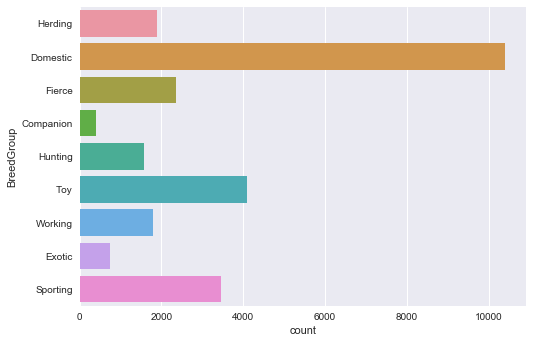

In [114]:
print(df_train2.groupby('BreedGroup').size())
sns.countplot(data =df_train2, y='BreedGroup')
plt.show()

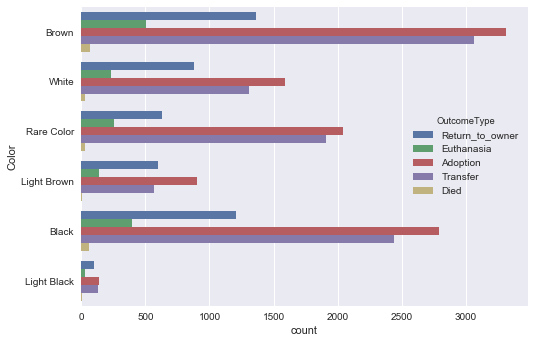

In [92]:
sns.countplot(data=df_train2, y=y_color,hue='OutcomeType')
plt.show()

In [29]:
# Feature selection
col = ['AnimalType','Name','AgeuponOutcome','SexuponOutcome','Breed','Color']
x = df_train2[col]
y = df_train2['OutcomeType']

In [30]:
# modeling
model2 = modeling(x,y)
rdf_score, rdf_std, rdf_accur  = model2.randomForest()
xg_score, xg_std, xg_accur = model2.xgboost()
grd_score, grd_param = model2.gridSearch()

print('[ RandomForest score ]')
print('Cross val score    : ', rdf_score)
print('Cross val std      : ', rdf_std)
print('Cross val accuracy : ', rdf_accur,'\n')

print('[ Xgboost score ]')
print('Cross val score    : ', xg_score)
print('Cross val std      : ', xg_std)
print('Cross val accuracy : ', xg_accur,'\n')   

print('[ GridSearch score ]')
print('Best params        : ', grd_param)
print('Cross val score    : ', grd_score)


[ RandomForest score ]
Cross val score    :  3.29083551791
Cross val std      :  0.176555932325
Cross val accuracy :  0.606531150489 

[ Xgboost score ]
Cross val score    :  0.851156634617
Cross val std      :  0.00699728536067
Cross val accuracy :  0.64820932185 

[ GridSearch score ]
Best params        :  {'max_depth': 5, 'n_estimators': 130}
Cross val score    :  0.851199092507


#### (3) 세 번째 모델

![model3](./image/3.jpg)

In [31]:
class preprocessing3():
    
    def __init__(self,df_data):
        self.df_data = df_data

    # execution
    def execution_pr(self):
        # AgeuponOutcome
        self.df_data['AgeuponOutcome'].fillna(value=0, inplace = True)
        
        def age_by_year(x):
            if x == 0: 
                return 0
            else:
                age = int(x.split(" ")[0])
                if x.find('year') >= 0: return age * 365
                if x.find('month') >= 0: return age * 12
                if x.find('week') >= 0: return age * 7
                if x.find('day') >= 0: return age 

        self.df_data['AgeuponOutcome'] = self.df_data['AgeuponOutcome'].apply(age_by_year)
        

        # SexuponOutcome
        self.df_data['SexuponOutcome'].fillna(value='Unknown', inplace=True)
        le = LabelEncoder()
        le.fit(self.df_data["SexuponOutcome"])
        self.df_data["SexuponOutcome"] = le.transform(self.df_data["SexuponOutcome"])
        
        #Name
        self.df_data['Name']= self.df_data['Name'].fillna(0)
        self.df_data['Name'] = self.df_data['Name'].apply(lambda x : 0 if x ==0 else 1)
        
        #Breed
        self.df_data['Breed'] = self.df_data['Breed'].apply(lambda x: 1 if 'Bull' in x else 0)
        
        #AnimalType
        self.df_data['AnimalType']= self.df_data['AnimalType'].apply(lambda x : 1 if x == 'Cat' else 0)
        
        return self.df_data

In [32]:
# Preprocessing
df_train3 = df_train.copy()
df_test3 = df_test.copy()

pr_train3 = preprocessing3(df_train3)
df_train3 = pr_train3.execution_pr()
pr_test3 = preprocessing3(df_test3)
df_test3  = pr_test3.execution_pr()

In [33]:
# Feature selection
col = ['AnimalType','Name','AgeuponOutcome','SexuponOutcome','Breed']

x = df_train3[col]
y = df_train3['OutcomeType']

In [34]:
model3 = modeling(x,y)
rdf_score, rdf_std, rdf_accur  = model3.randomForest()
xg_score, xg_std, xg_accur = model3.xgboost()
grd_score, grd_param = model3.gridSearch()

print('[ RandomForest score ]')
print('Cross val score    : ', rdf_score)
print('Cross val std      : ', rdf_std)
print('Cross val accuracy : ', rdf_accur,'\n')

print('[ Xgboost score ]')
print('Cross val score    : ', xg_score)
print('Cross val std      : ', xg_std)
print('Cross val accuracy : ', xg_accur,'\n')  

print('[ GridSearch score ]')
print('Best params        : ', grd_param)
print('Cross val score    : ', grd_score)

[ RandomForest score ]
Cross val score    :  1.299875801
Cross val std      :  0.140822952615
Cross val accuracy :  0.640239369802 

[ Xgboost score ]
Cross val score    :  0.843705655553
Cross val std      :  0.00882781685813
Cross val accuracy :  0.647686090717 

[ GridSearch score ]
Best params        :  {'max_depth': 5, 'n_estimators': 100}
Cross val score    :  0.842370765332


### 5. 최종 모델

* 변수 :  AnimalType, Name, AgeuponOutcome, SexuponOutcome, Breed

In [43]:
def xgboost_final(x,y):
    cv = KFold(20, shuffle = True)
    xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=5)
    xgscore = cross_val_score(xgb, x, y, scoring="neg_log_loss", cv=cv)*-1
    xgscore_mean = xgscore.mean()
    xgscore_std  = xgscore.std()
    xgaccur = cross_val_score(xgb, x, y, scoring="accuracy", cv=cv).mean()

    return xgscore_mean,xgscore_std,xgaccur

In [44]:
xg_score, xg_std, xg_accur = xgboost_final(x,y)

print('[ Xgboost score ]')
print('Cross val score    : ', xg_score)
print('Cross val std      : ', xg_std)
print('Cross val accuracy : ', xg_accur,'\n')  

[ Xgboost score ]
Cross val score    :  0.842271360308
Cross val std      :  0.0252773114938
Cross val accuracy :  0.649219306339 



* Test score

In [37]:
col = ['AnimalType','Name','AgeuponOutcome','SexuponOutcome','Breed']

test_x = df_test3[col]

In [38]:
xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=5)
xgb.fit(x,y)
y_pred_loss = xgb.predict_proba(test_x)
np.savetxt("y_pred_proba_2.csv", y_pred_loss, delimiter=",")

![score](./image/score.jpg)

In [125]:
df_submit = pd.read_csv('data/sample_submission.csv')
df_submit.tail()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
11451,11452,0.92000,0.00208,0.0086,0.00842,0.0609
11452,11453,0.00238,0.01590,0.0189,0.00538,0.9570
11453,11454,0.00419,0.00786,0.0954,0.00681,0.8860
11454,11455,0.33500,0.00187,0.0365,0.45600,0.1700
11455,11456,0.04230,0.00391,0.1170,0.51500,0.3210


In [126]:
y_pred = xgb.predict(x)
print(classification_report(y, y_pred, target_names=['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']))

                 precision    recall  f1-score   support

       Adoption       0.65      0.83      0.73     10769
           Died       1.00      0.01      0.02       197
     Euthanasia       0.66      0.18      0.28      1555
Return_to_owner       0.47      0.50      0.48      4786
       Transfer       0.77      0.62      0.69      9422

    avg / total       0.66      0.65      0.64     26729

